In [95]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [96]:
import pandas as pd

# Loading the dataset
df = pd.read_csv('C:\\Users\\UK\\Desktop\\UH Data Science\ADS ASGN\Internation_students_Canada.csv')

# Checking data types of each column
print(df.dtypes)
print(df.head())

Country of Citizenship    object
2015                       int64
2016                       int64
2017                       int64
2018                       int64
2019                       int64
2020                       int64
2021                       int64
2022                       int64
2023                       int64
dtype: object
  Country of Citizenship  2015  2016  2017  2018  2019  2020  2021  2022  2023
0            Afghanistan    95   115    95    80    95    90    80   170   140
1                Albania   115   165   185   245   375   250   305   345   545
2                Algeria  1060   845  1020  1490  2690  2170  3165  5360  7180
3                Andorra     0     0     0     0     0     0    10     5     0
4                 Angola    65    80    40    25   120    30    50    75    65


# Cleaning Data

In [97]:
# To check the duplicate values.
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
212    False
213    False
214    False
215    False
216    False
Length: 217, dtype: bool

In [98]:
# To check the null values
df.isnull()

,Country of Citizenship,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
212,False,False,False,False,False,False,False,False,False,False
213,False,False,False,False,False,False,False,False,False,False
214,False,False,False,False,False,False,False,False,False,False
215,False,False,False,False,False,False,False,False,False,False


In [99]:
# checking uniquenss
df['Country of Citizenship'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahama Islands, The',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin, Republic of', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire, Sin Eustatius And Saba', 'Bosnia-Herzegovina',
       'Botswana, Republic of', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina-Faso', 'Burundi', 'Cambodia',
       'Cameroon, Federal Republic of', 'Cape Verde Islands',
       'Cayman Islands', 'Central African Republic', 'Chad, Republic of',
       'Chile', "China, People's Republic of", 'Colombia', 'Comoros',
       'Congo, Democratic Republic of the',
       "Congo, People's Republic of the", 'Costa Rica', 'Croatia', 'Cuba',
       'Curacao', 'Cyprus', 'Czech Republic', 'Denmark',
       'Djibouti, Republic of', 'Dominica', 'Dominican Republic',
       'East Timor, Democratic Re

In [100]:
# setting the 'Country of Citizenship' column as the index using set_index() method
df.set_index('Country of Citizenship', inplace=True)

# Adding 'Total' column which sums up total students of each country over these years
df['Total'] = df.sum(axis=1)
df['Total']

Country of Citizenship
Afghanistan                  960
Albania                     2530
Algeria                    24980
Andorra                       15
Angola                       550
                           ...  
Virgin Islands, British        0
Western Sahara                 0
Yemen                       1995
Zambia                      1225
Zimbabwe                    4395
Name: Total, Length: 217, dtype: int64

In [101]:
# total number of missing values in each column
df.isnull().sum()

2015     0
2016     0
2017     0
2018     0
2019     0
2020     0
2021     0
2022     0
2023     0
Total    0
dtype: int64

In [102]:
df.describe()

,2015,2016,2017,2018,2019,2020,2021,2022,2023,Total
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,2.170000e+02
mean,1047.649770,1268.917051,1510.967742,1692.741935,1898.986175,1245.668203,2121.059908,2616.036866,2740.414747,1.614244e+04
std,5362.640744,6741.540436,8403.593118,9729.000854,11360.882179,7180.221219,12670.061927,16425.316706,15791.033191,8.971383e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,5.000000,10.000000,10.000000,10.000000,10.000000,5.000000,15.000000,15.000000,20.000000,1.250000e+02
50%,85.000000,100.000000,105.000000,105.000000,120.000000,70.000000,135.000000,145.000000,145.000000,1.090000e+03
75%,335.000000,420.000000,445.000000,475.000000,540.000000,415.000000,630.000000,665.000000,775.000000,5.100000e+03
max,68350.000000,80525.000000,87290.000000,109290.000000,140250.000000,84590.000000,174595.000000,232640.000000,220035.000000,1.131605e+06


In [103]:
#To avoid this ambuigity, let's convert the column names into strings
df.columns = list(map(str, df.columns))

In [104]:
#let's declare a variable that will allow us to easily call upon the full range of years:To be useful for plotting later on
years = list(map(str, range(2015, 2024)))
years

['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']

In [105]:
#To get the list of the countries in descending order
df.sort_values(by='Total', ascending=False, axis=0, inplace=True)
top_10 = df.head(10)

In [106]:
top_10

,2015,2016,2017,2018,2019,2020,2021,2022,2023,Total
Country of Citizenship,,,,,,,,,,
India,32465,53450,84290,109290,140250,84590,174595,232640,220035,1131605
"China, People's Republic of",68350,80525,87290,89200,87675,61010,58380,54160,57440,644030
"Korea, Republic of",15870,17230,18010,18010,17915,11805,11145,12095,10390,132470
France,12125,12150,13570,13690,14825,8390,20630,17090,15400,127870
Nigeria,6610,6545,6300,6865,7820,6275,10105,16985,33600,101105
Philippines,1950,3035,2910,4250,6480,4620,14800,25770,29690,93505
Vietnam,2980,5495,10130,12700,12130,9990,9670,10365,10280,83740
Brazil,6625,7735,9565,10950,10835,6520,8780,10680,9705,81395
Iran,2405,3095,4860,7260,10060,7435,12420,13890,13735,75160


# 1. Relational Graph: Scatter Plot

In [107]:

def plot_scatter_graph(df):
    '''
    Plots a scatter graph to see the correlation between students from different countries in canada over years
    '''
    total_per_year = pd.DataFrame(df[years].sum(axis=0)).reset_index()
    total_per_year.columns = ['Year', 'Total']

    # Converting 'Year' to numeric for plotting
    total_per_year['Year'] = pd.to_numeric(total_per_year['Year'])

    plt.figure(dpi= 144)
    plt.plot(total_per_year['Year'], total_per_year['Total'], color='#1f77b4')
    plt.title('Total number of International Students in Canada (2015 - 2023)')
    plt.xlabel('Years')
    plt.ylabel('Number of Students')
    plt.grid(True)
    plt.show()
    return


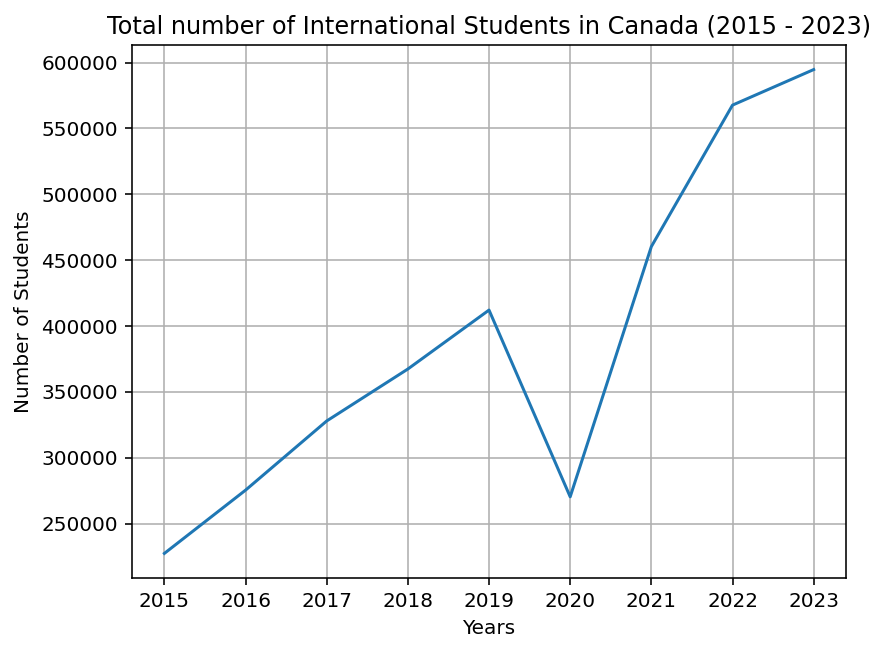

In [108]:
plot_scatter_graph(df)

# 2. Categorical Graph: Bar Plot

In [109]:
def plot_bar_graph(df, top_n=2):
    '''
    Plots a multi-category bar graph of the top N countries by the number of students for each year.
    '''
    # Sortcountries and selecting top 2
    latest_year2023 = df.columns[-1] 
    top2_countries = df.sort_values(by=latest_year2023, ascending=False).head(2)
    
    # Setting colors here
    colors = ['#1f77b4', '#aec7e8']  
    
    # Plotting
    years = [str(year) for year in range(2015, 2024)]
    index = np.arange(len(years))
    bar_width = 0.2
    positions = [index + bar_width*i for i in range(top_n)]
    
    for i, country in enumerate(top2_countries.index):
        plt.bar(positions[i], top2_countries.loc[country, years], bar_width, label=country, color=colors[i % len(colors)])
        
    plt.xlabel('Years')
    plt.ylabel('Number of Students')
    plt.title(f'Top 2 Countries by International Studentsin Canada (2015-2023)')
    plt.xticks(index + bar_width * 0.5, years)  
    plt.legend(title='Country of Citizenship')
    plt.show()


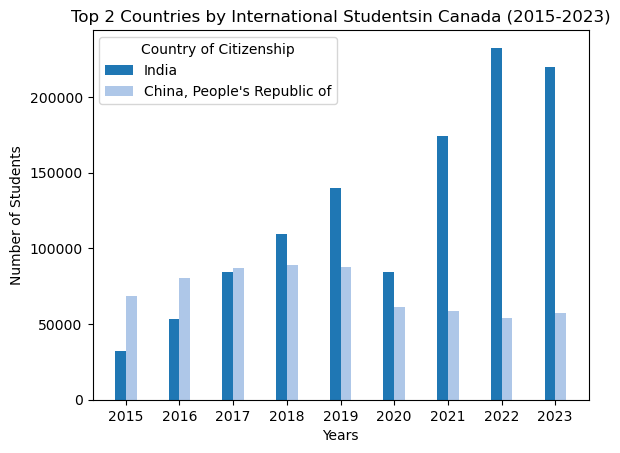

In [110]:
plot_bar_graph(df, top_n=2)

# 3. Statistical Graph: HeatMap Plot

In [111]:
def plot_heat_correlation(top10_countries, kendall_corr):
    # Summing up the students by country across years
    df['Total'] = df.iloc[:, 1:].sum(axis=1)
    
    top10_countries = df.sort_values(by='Total', ascending=False).head(10)

    # Selecting only the year columns for correlation
    year_columns = df.columns[:-1]  # Excluding 'Country of Citizenship' and the 'Total' column
    
    # Calculate Kendall's tau correlation matrix
    kendall_corr = top10_countries[year_columns].corr(method='kendall')
    
    # Plotting
    plt.figure(dpi= 144)
    sns.heatmap(kendall_corr, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Kendall HeatMap')
    plt.show()

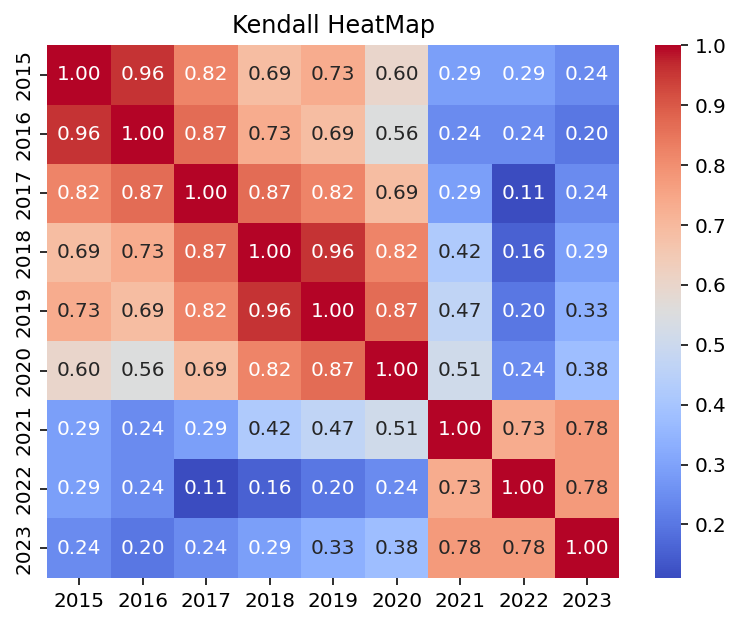

In [112]:
plot_heat_correlation(top10_countries=True, kendall_corr=True)

In [113]:
from scipy.stats import skew, kurtosis

# To calculate skewness
skewness = df.apply(lambda x: skew(x.dropna()))
print("Skewness:\n", skewness)

# To calculate kurtosis
kurtosis_vals = df.apply(lambda x: kurtosis(x.dropna(), fisher=True))
print("Kurtosis:\n", kurtosis_vals)

Skewness:
 2015     10.270551
2016      9.783612
2017      9.429245
2018      9.694912
2019     10.403789
2020      9.965292
2021     12.137688
2022     12.910722
2023     12.346653
Total    10.678733
dtype: float64
Kurtosis:
 2015     118.256849
2016     102.732349
2017      91.382496
2018      97.082100
2019     114.437345
2020     103.798300
2021     158.550481
2022     176.370073
2023     164.547948
Total    122.742808
dtype: float64
